In [ ]:
# Helper functions

# Returns the letter that corresponds to a given number
def num_to_letter(num):
  if num > 9:
    # "Greater than than" J
    num += 1
  return chr(ord('A')+num)

In [ ]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Paths
path = 'drive/Shareddrives/Machine Learning/'
train_path = path + 'sign_mnist_train.csv'
test_path = path + 'sign_mnist_test.csv'

In [ ]:
# Load data into pandas df
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train df:")
print(train_df.head())
print("Test df:")
print(test_df.head())

# Account for 'j' case by decrementing >9 by 1
# to prevent producing any 'j' values in the network
for i in range(len(train_df)):            # Train
  if(train_df.loc[i,'label'] > 9):
    train_df.loc[i,'label'] -= 1
for i in range(len(test_df)):             # Test
  if(test_df.loc[i,'label'] > 9):
    test_df.loc[i,'label'] -= 1    

Train df:
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]
Test df:
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180
2     10      85      88      92  ...       226       225       224       222
3      0     203     205     207  ...       230       240       253       255
4      3     188     191     193  ...        49        46        46        53

[5 rows x 785 column

In [ ]:
# Load X data
train_pixels = train_df[train_df.columns[1:]].values.reshape(train_df.shape[0], 28, 28, 1)
test_pixels = test_df[test_df.columns[1:]].values.reshape(test_df.shape[0], 28, 28, 1)

# Load y data with one-hot encoding
y_train = train_df['label'].values
y_test = test_df['label'].values
train_labels = to_categorical(train_df['label'])
test_labels = to_categorical(test_df['label'])

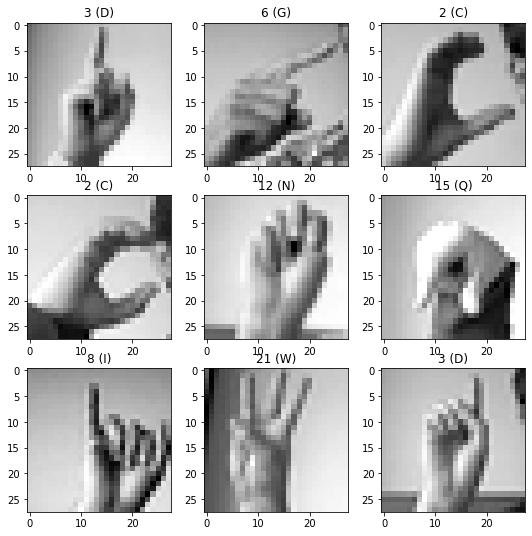

In [ ]:
# Plot some examples of the images in the dataset
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_pixels[i].reshape(28,28), cmap='gray')
    plt.title(str(y_train[i]) + " (" + num_to_letter(y_train[i]) + ")")
    
plt.show()

In [ ]:
# Parameters
epochs = 5
batch_size = 100
img_width = 28
img_height = 28
input_shape = (img_width, img_height, 1)

# Define the model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), input_shape=input_shape, activation='selu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), input_shape=input_shape, activation='selu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(24, activation = 'softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 24)                76824     
Total params: 227,736
Trainable params: 227,736
Non-trainable params: 0
_______________________________________________

In [ ]:
print('pixels', train_pixels.shape)
print('labels', train_labels.shape)

# Model Training
history = model.fit(x=train_pixels, y=train_labels, epochs=epochs, batch_size=batch_size, validation_split = 0.2)

pixels (27455, 28, 28, 1)
labels (27455, 24)
Epoch 1/8
110/110 [==============================] - 40s 360ms/step - loss: 9.3799 - accuracy: 0.2067 - val_loss: 0.4641 - val_accuracy: 0.8762
Epoch 2/8
110/110 [==============================] - 39s 358ms/step - loss: 0.6706 - accuracy: 0.7788 - val_loss: 0.1006 - val_accuracy: 0.9873
Epoch 3/8
110/110 [==============================] - 39s 357ms/step - loss: 0.2702 - accuracy: 0.9138 - val_loss: 0.0332 - val_accuracy: 0.9969
Epoch 4/8
110/110 [==============================] - 39s 351ms/step - loss: 0.1648 - accuracy: 0.9444 - val_loss: 0.0099 - val_accuracy: 0.9995
Epoch 5/8
110/110 [==============================] - 39s 351ms/step - loss: 0.1037 - accuracy: 0.9667 - val_loss: 0.0077 - val_accuracy: 0.9998
Epoch 6/8
110/110 [==============================] - 38s 348ms/step - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.0046 - val_accuracy: 0.9998
Epoch 7/8
110/110 [==============================] - 39s 350ms/step - loss: 0.0722 - accura

In [ ]:
# Run the model on test data
predictions = model.predict(test_pixels)

# Find the class the model is most confident each case falls into
predicted_classes = np.argmax(predictions, axis=1)
print("Pred:", predicted_classes)
print("Real:", y_test)

# Find % match
total_matches = 0
for i in range(len(predicted_classes)):
  if predicted_classes[i] == y_test[i]:
    total_matches += 1
match_percent = (total_matches/len(predicted_classes)) * 100
print(str(match_percent) + "% of the model's predictions were correct.")

Pred: [6 5 9 ... 2 4 2]
Real: [6 5 9 ... 2 4 2]
94.5761293920803% of the model's predictions were correct.


In [ ]:
model.save("drive/Shareddrives/Machine Learning/Models/90_model")

INFO:tensorflow:Assets written to: drive/Shareddrives/Machine Learning/Models/90_model/assets
